## Observations and Insights 

# Observations

1:Out of the ten participating drugs, Capomulin and Ramicane had greater number of timepoints than the other drugs while propriva was tested the least. Among all the participating mice, number of male mice is greater than female participating mice by 2%.
2:The correlation between mouse weight, and average tumor volume is 0.84 which is very strong positive correlation. With the increase in mouse weight, the average tumor volume also increases.
3: Among the four selected drug regimens, Capomulin and Ramicane gave best results for the tumour size reduction.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,how="outer", on="Mouse ID")
# Display the data table for preview
combined_data_df=pd.DataFrame(combined_data)
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice.
num_of_mice=combined_data_df["Mouse ID"].nunique()
num_of_mice

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']
duplicate_mice.unique()

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data=combined_data_df.loc[combined_data_df["Mouse ID"]=="g989"]
duplicate_mice_data_df=pd.DataFrame(duplicate_mice_data)
duplicate_mice_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice)==False]
clean_data_df=pd.DataFrame(clean_data)
clean_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice in the clean DataFrame.
new_mice_count=clean_data["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
mean=clean_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].mean()
median=clean_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].median()
variance=clean_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].var()
standard_deviation=clean_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].std()
sem=clean_data.groupby("Drug Regimen")["Tumour Volume (mm3)"].sem()
summary_statistics=pd.DataFrame({"Mean Tumour Volume":mean,
                                "Median Tumour Volume":median,
                                "Variance Tumour Volume":variance,
                                "Standard Deviation Tumour Volume":standard_deviation,
                                "SEM Tumour Volume":sem})

summary_statistics               

,Mean Tumour Volume,Median Tumour Volume,Variance Tumour Volume,Standard Deviation Tumour Volume,SEM Tumour Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary=clean_data.groupby("Drug Regimen")[["Tumour Volume (mm3)"]].agg(['mean','median','var','std','sem'])
summary

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

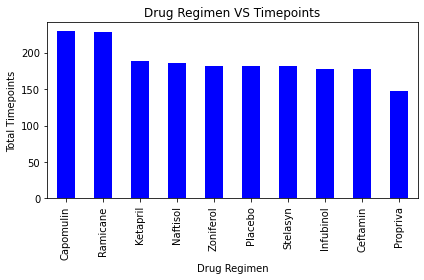

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
each_drug_regimen=clean_data["Drug Regimen"].value_counts()
each_drug_regimen.plot.bar(color='b')
plt.title("Drug Regimen VS Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.tight_layout()

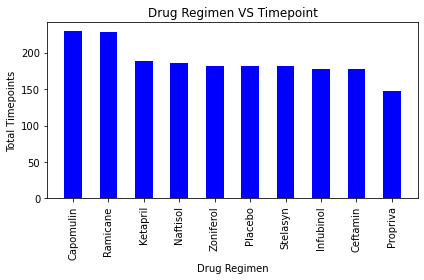

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis =each_drug_regimen.index.values
y_axis=each_drug_regimen.values
tick_locations = [value for value in x_axis]
plt.figure()
plt.bar(x_axis,y_axis,width=0.5,color='b', align="center")
plt.xticks(rotation="vertical")
plt.title("Drug Regimen VS Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.tight_layout()
plt.show()

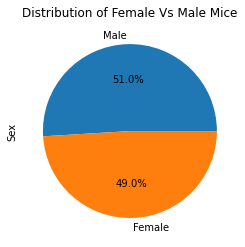

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male=clean_data_df['Sex'].value_counts()
female_vs_male.plot.pie(autopct= "%1.1f%%")
plt.title("Distribution of Female Vs Male Mice")
plt.show()

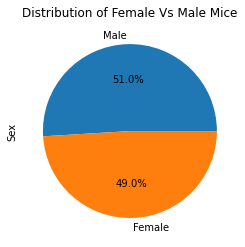

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=female_vs_male.index
sizes=female_vs_male
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title('Distribution of Female Vs Male Mice')
plt.ylabel('Sex')
plt.show() 

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=clean_data_df.groupby(["Mouse ID"])[['Timepoint']].max()
group_df=pd.DataFrame(greatest_timepoint)
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
merged_groups = group_df.merge(clean_data_df , on = ['Mouse ID' , 'Timepoint'],how='left')
merged_groups.head()
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumour volumes
    final_tumour_vol=merged_groups.loc[merged_groups["Drug Regimen"]==treatment,"Tumour Volume (mm3)"]
    # add subset  
    tumour_vol_data.append(final_tumour_vol)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumour_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")
    

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 


In [39]:
merged_groups

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


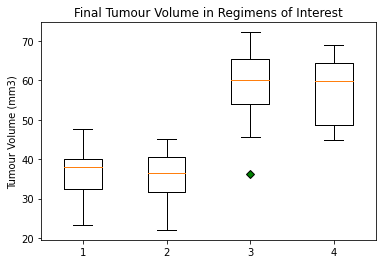

In [40]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumour Volume in Regimens of Interest')
ax1.set_ylabel('Tumour Volume (mm3)')
ax1.boxplot(tumour_vol_data, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

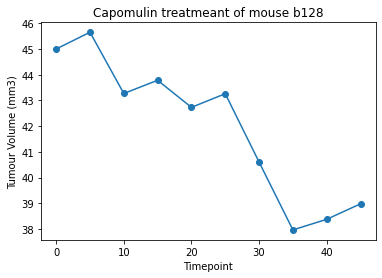

In [41]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_data=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
one_mouse=capomulin_data.loc[capomulin_data["Mouse ID"]=="b128"]


x_axis = one_mouse["Timepoint"]
y_axis = one_mouse["Tumour Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis,y_axis,marker= "o")
plt.xlabel('Timepoint')
plt.ylabel('Tumour Volume (mm3)')
plt.show()



Text(0, 0.5, 'Tumour Volume (mm3)')

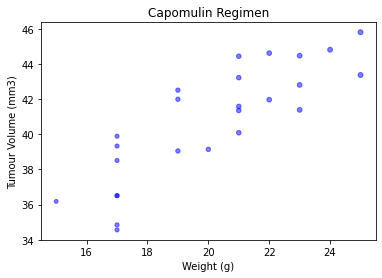

In [42]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
avg_capomulin_data=capomulin_data.groupby("Mouse ID")[["Tumour Volume (mm3)","Weight (g)"]].mean()

x_axis = avg_capomulin_data["Weight (g)"]
y_axis = avg_capomulin_data["Tumour Volume (mm3)"]
plt.scatter(x_axis, y_axis,color='b', marker="o", s=x_axis, 
            alpha=0.50)
plt.title("Capomulin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')

## Correlation and Regression

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

# correlation coefficient
correlation_coefficient = st.pearsonr(avg_capomulin_data['Weight (g)'],avg_capomulin_data['Tumour Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.7088568047708723


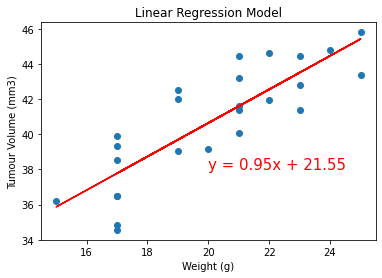

In [47]:
# linear regression
x_values = avg_capomulin_data["Weight (g)"]
y_values = avg_capomulin_data["Tumour Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title('Linear Regression Model')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()